<a href="https://www.kaggle.com/code/yousseftarhri/eda-house-price-prediction?scriptVersionId=124228749" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
#tessts

# Dataset :
**We have two dataset, the training set and the test set.**

In [2]:
train_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**The dataset have 81 columns, let's see what the columns that have missing values.**

In [4]:
features_na = [f for f in train_data.columns if train_data[f].isnull().sum()>1]
features_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [5]:
len(train_data['MiscFeature'])

1460

# Missing values
**We want to know the percentage of missing values in each feature.**

In [6]:
list_na = []
for i in features_na: 
    x= np.round(train_data[i].isnull().mean(),2)
    print(i,  x,'% missing values')
    list_na.append(x)

LotFrontage 0.18 % missing values
Alley 0.94 % missing values
MasVnrType 0.01 % missing values
MasVnrArea 0.01 % missing values
BsmtQual 0.03 % missing values
BsmtCond 0.03 % missing values
BsmtExposure 0.03 % missing values
BsmtFinType1 0.03 % missing values
BsmtFinType2 0.03 % missing values
FireplaceQu 0.47 % missing values
GarageType 0.06 % missing values
GarageYrBlt 0.06 % missing values
GarageFinish 0.06 % missing values
GarageQual 0.06 % missing values
GarageCond 0.06 % missing values
PoolQC 1.0 % missing values
Fence 0.81 % missing values
MiscFeature 0.96 % missing values


In [7]:
list_na

[0.18,
 0.94,
 0.01,
 0.01,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.47,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 1.0,
 0.81,
 0.96]

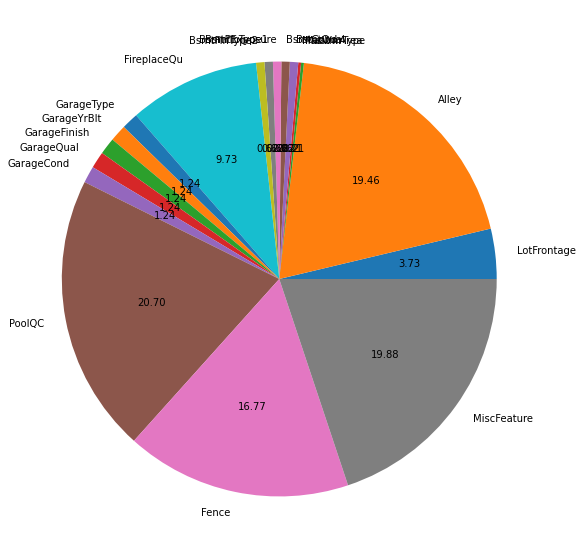

In [8]:
plt.figure(figsize = (10,10))
plt.pie(list_na,labels = features_na,autopct='%.2f' )
plt.show()

**We will represent 1 by missing values and 0 by not missing values, our goal is to see what is the mean of sale price of the missing values, and for the not missing values.**

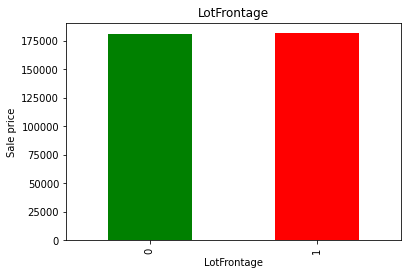

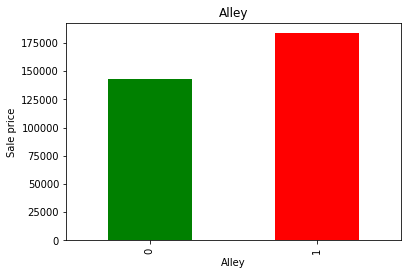

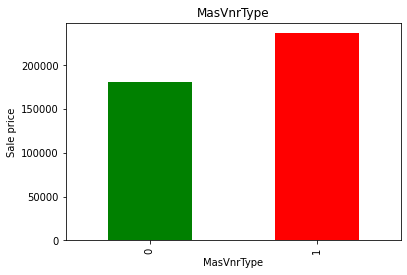

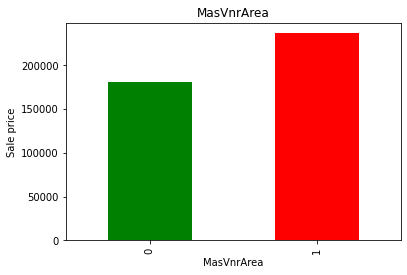

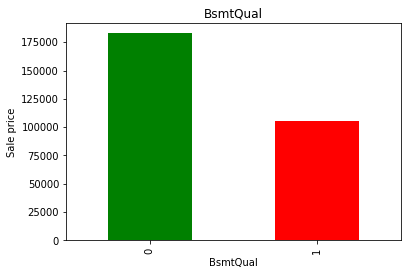

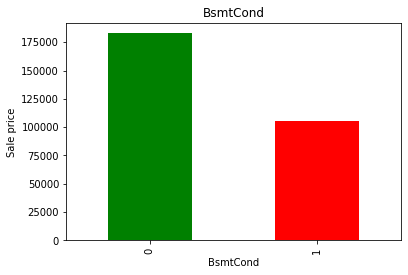

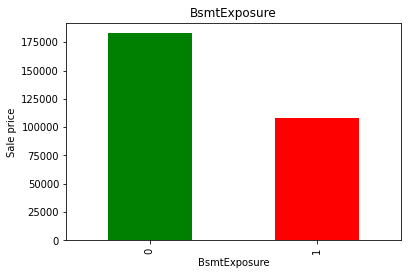

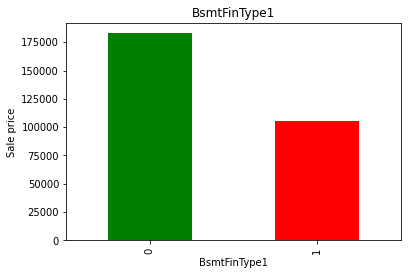

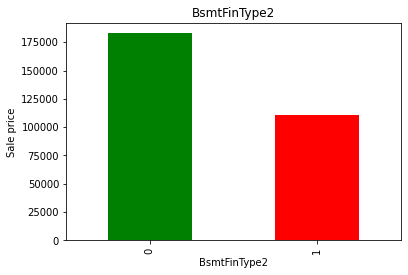

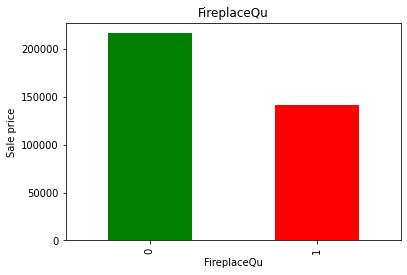

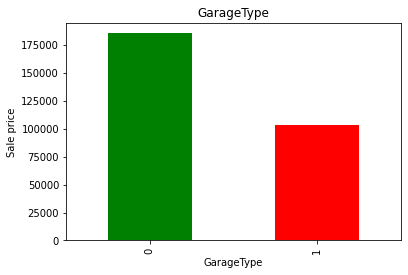

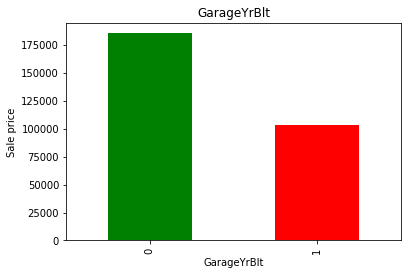

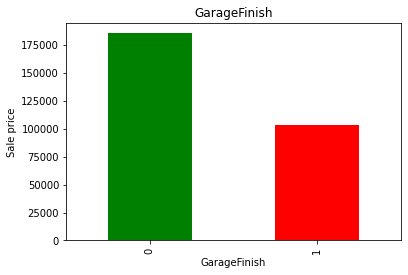

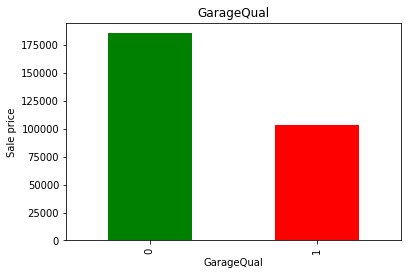

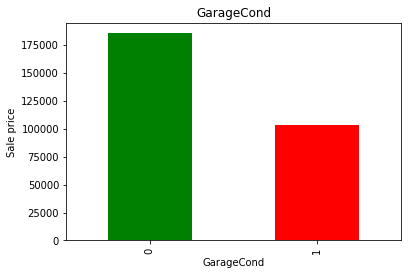

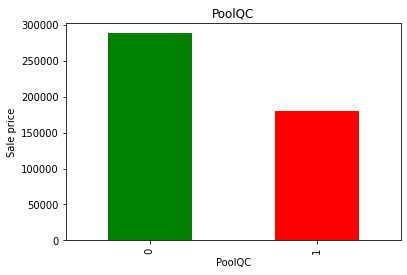

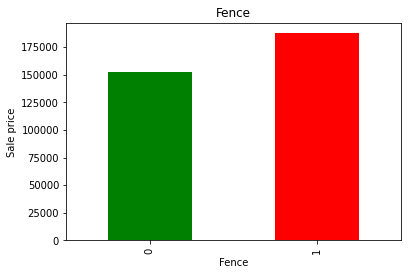

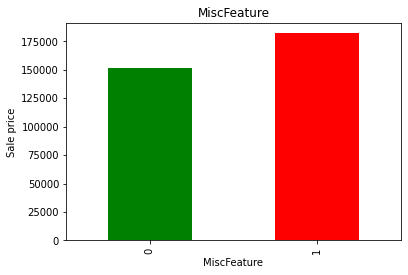

In [9]:
for i in features_na :
    data = train_data.copy()
    data[i] = np.where(data[i].isnull(),1,0)
    
    data.groupby(i)['SalePrice'].mean().plot.bar(color=['green','red'])
    plt.title(i)
    plt.ylabel("Sale price")
    plt.show()

# Numeric data.
**We will count the features that have numeric data.**

In [10]:
numeric_columns = train_data.select_dtypes(include=['int64','float64'])
nc = len(numeric_columns.columns)
non_numeric_columns = len(train_data.columns) - nc
print("numeric columns : " , nc ,"\n", "Not numeric columns : ",non_numeric_columns)

numeric columns :  38 
 Not numeric columns :  43


In [11]:
numeric_columns.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [12]:
years = [f for f in train_data.columns if "Yr" in f or "Year" in f]
years

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

**Here we want to know if there is a relationship between years and sale price.**

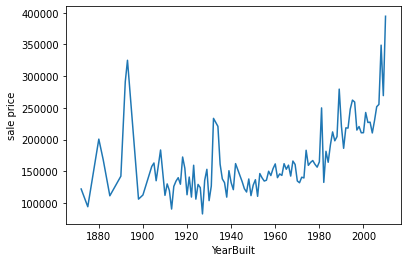

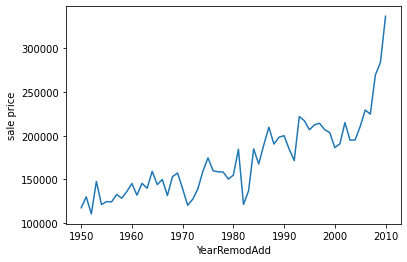

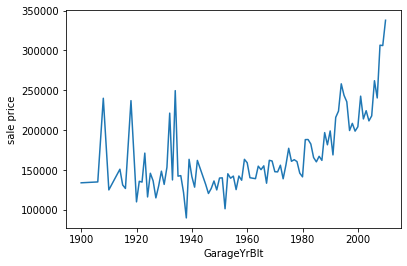

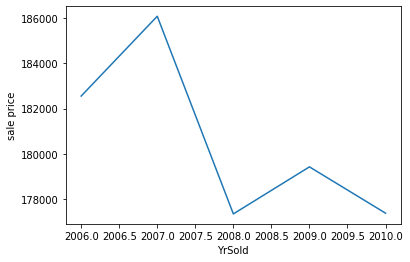

In [13]:
for i in years : 
    data = train_data.copy()
    data.groupby(i)['SalePrice'].mean().plot()
    plt.xlabel(i)
    plt.ylabel("sale price")
    plt.show()

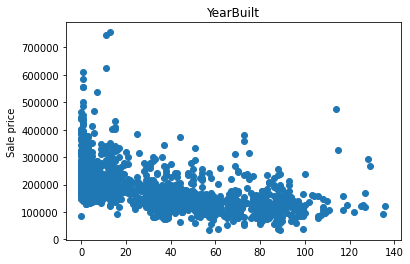

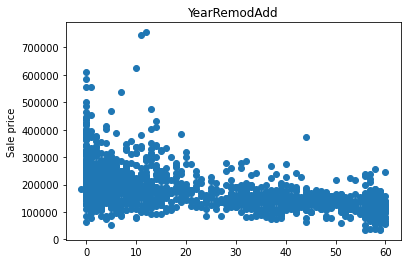

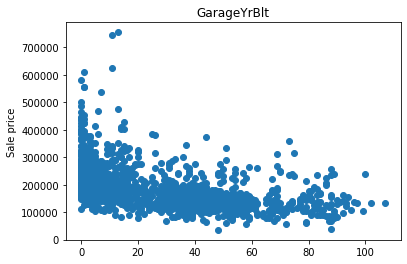

In [14]:
for i in years : 
    if i != "YrSold" :
        data = train_data.copy()
        data[i] = data['YrSold'] - data[i]
        plt.scatter(data[i],data["SalePrice"])
        plt.title(i)
        plt.ylabel("Sale price")
        plt.show()

# **Discrect values**

In [15]:
discret_features = [f for f in numeric_columns.columns if len(train_data[f].unique())<20 and f not in years+['Id']]
discret_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold']

In [16]:
train_data[discret_features].head()

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,60,7,5,1,0,2,1,3,1,8,0,2,0,2
1,20,6,8,0,1,2,0,3,1,6,1,2,0,5
2,60,7,5,1,0,2,1,3,1,6,1,2,0,9
3,70,7,5,1,0,1,0,3,1,7,1,3,0,2
4,60,8,5,1,0,2,1,4,1,9,1,3,0,12


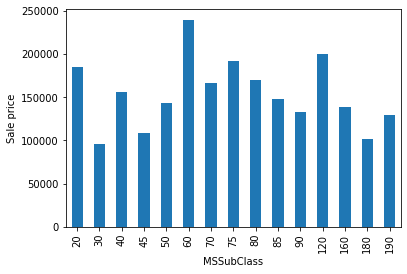

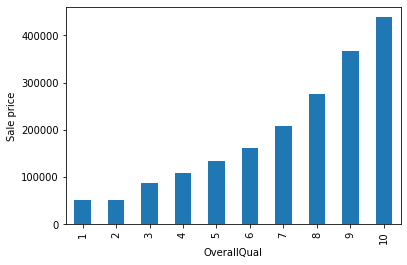

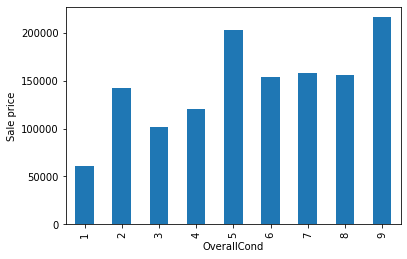

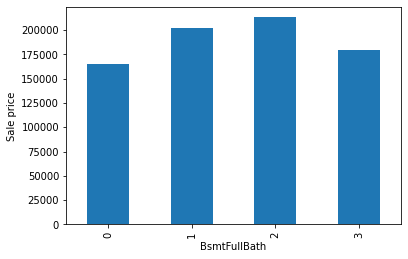

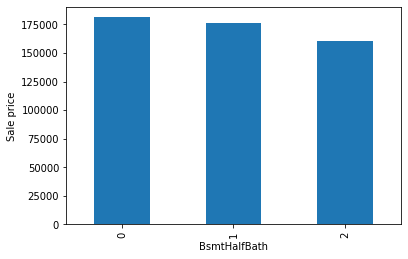

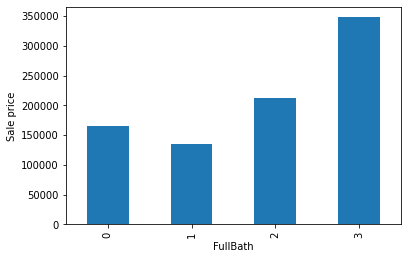

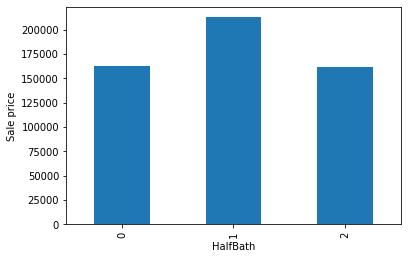

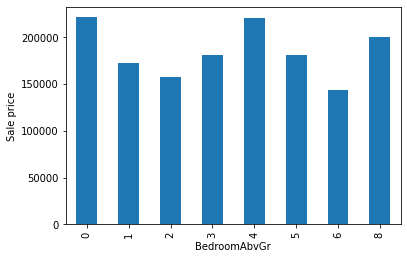

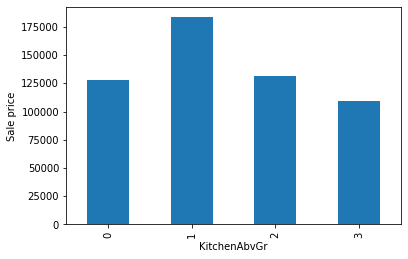

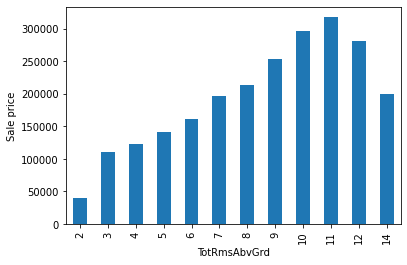

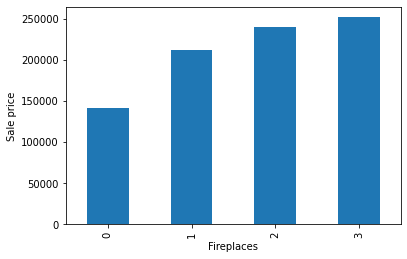

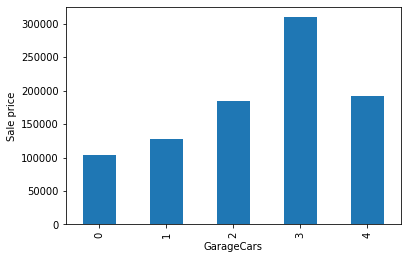

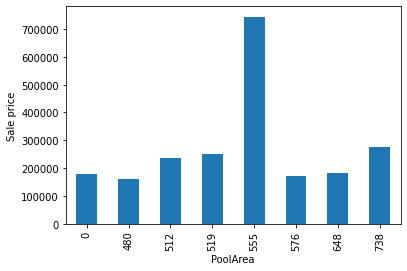

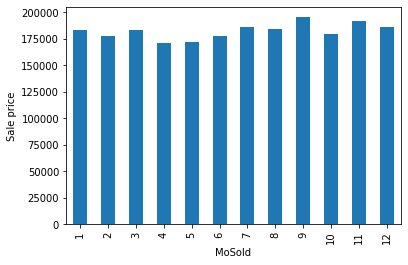

In [17]:
for i in discret_features : 
    data = train_data.copy()
    data.groupby(i)['SalePrice'].mean().plot.bar()
    plt.xlabel(i)
    plt.ylabel("Sale price")
    plt.show()

# **Continuous values**

In [18]:
continuous_features = [f for f in numeric_columns.columns if f not in discret_features+years+['Id']]
continuous_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [19]:
train_data[continuous_features].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,250000


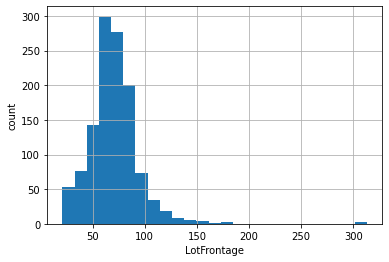

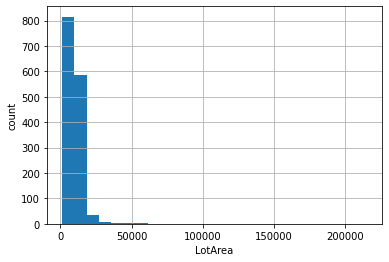

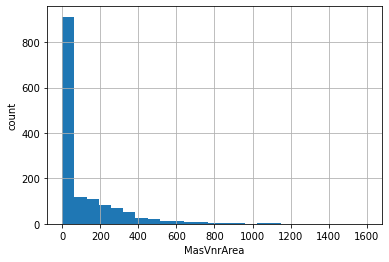

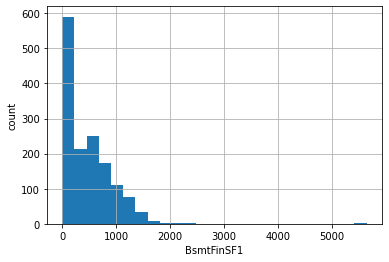

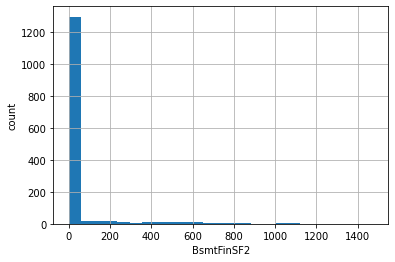

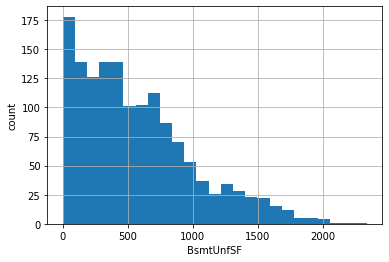

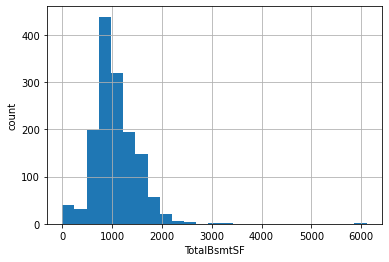

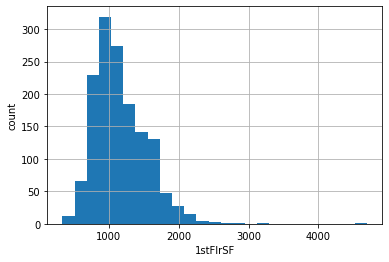

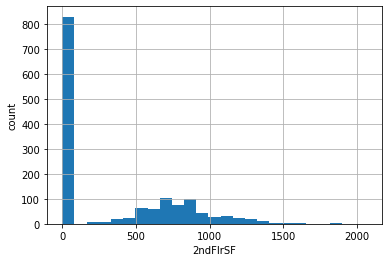

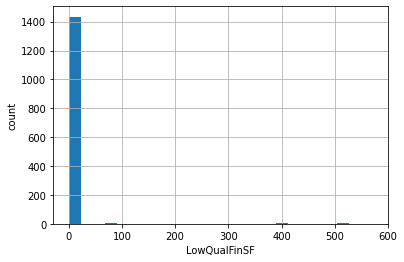

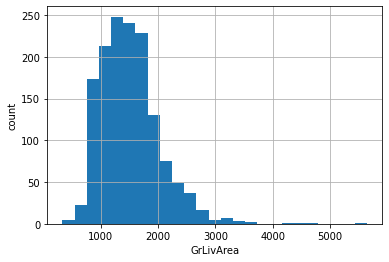

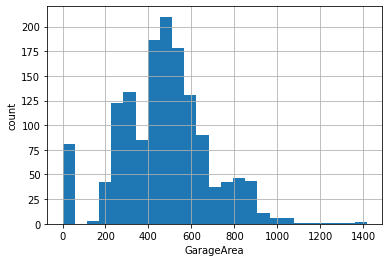

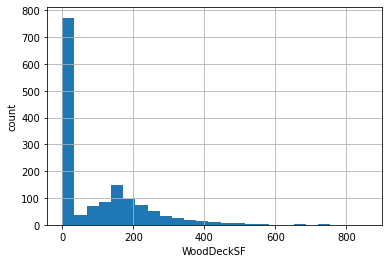

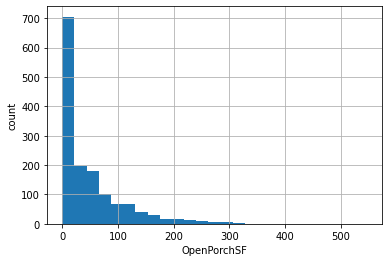

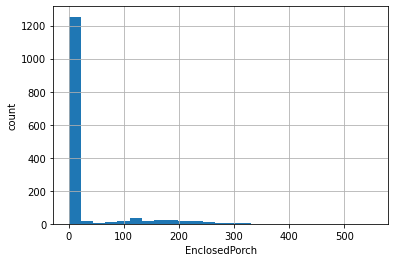

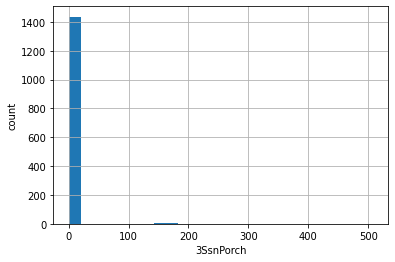

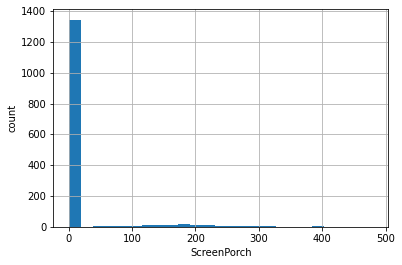

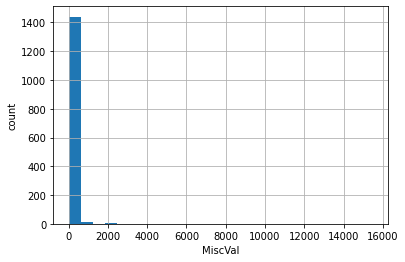

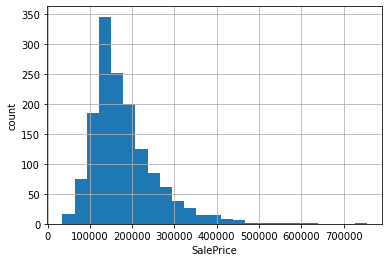

In [20]:
for i in continuous_features :
    data = train_data.copy()
    data[i].hist(bins=25)
    plt.xlabel(i)
    plt.ylabel("count")
    plt.show()

# **Categorical features**

In [21]:
categorical_featues = [f for f in train_data.columns if train_data[f].dtypes=='O']
categorical_featues

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [22]:
train_data[categorical_featues].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [23]:
print("The total of categorical featues is",len(train_data[categorical_featues].columns))

The total of categorical featues is 43


In [24]:
for i in categorical_featues:
    print("The number of categorical featue",i,"is",len(train_data[i].unique()))

The number of categorical featue MSZoning is 5
The number of categorical featue Street is 2
The number of categorical featue Alley is 3
The number of categorical featue LotShape is 4
The number of categorical featue LandContour is 4
The number of categorical featue Utilities is 2
The number of categorical featue LotConfig is 5
The number of categorical featue LandSlope is 3
The number of categorical featue Neighborhood is 25
The number of categorical featue Condition1 is 9
The number of categorical featue Condition2 is 8
The number of categorical featue BldgType is 5
The number of categorical featue HouseStyle is 8
The number of categorical featue RoofStyle is 6
The number of categorical featue RoofMatl is 8
The number of categorical featue Exterior1st is 15
The number of categorical featue Exterior2nd is 16
The number of categorical featue MasVnrType is 5
The number of categorical featue ExterQual is 4
The number of categorical featue ExterCond is 5
The number of categorical featue Fo

**The relashionship between the categorical featues and the dependent variable**

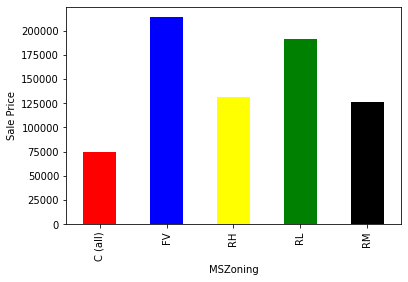

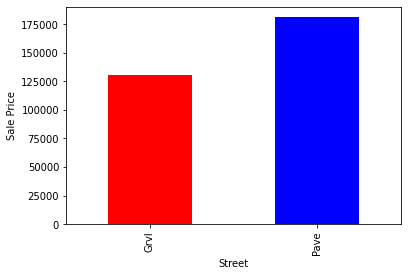

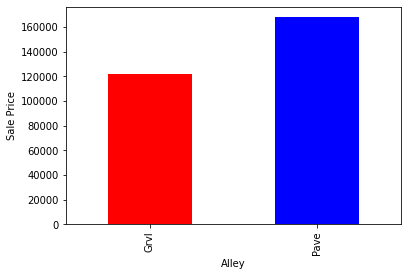

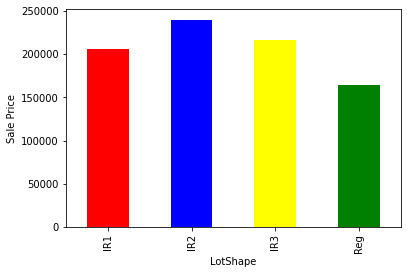

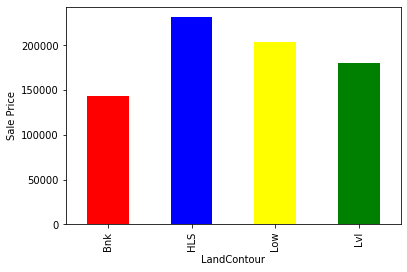

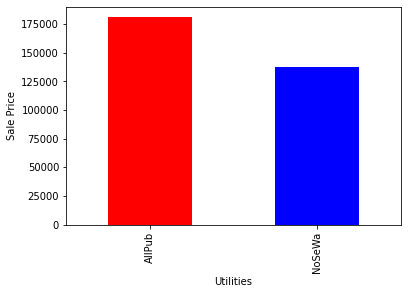

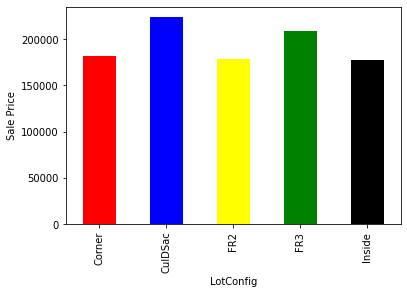

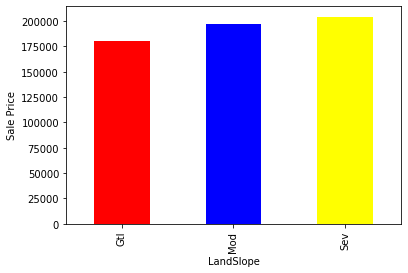

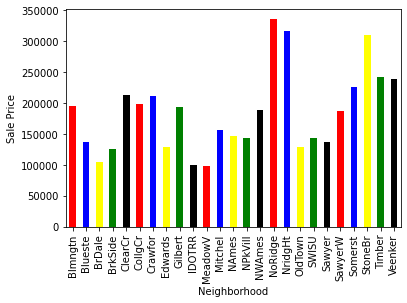

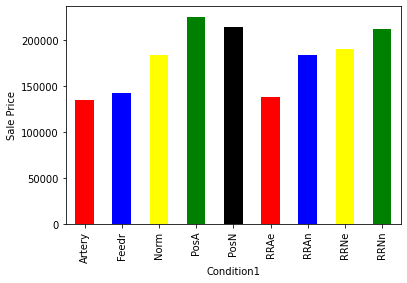

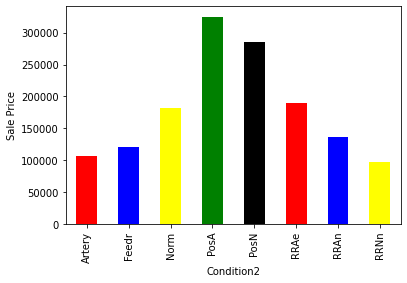

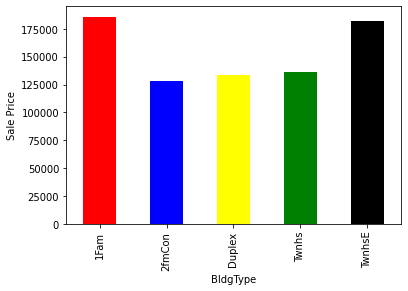

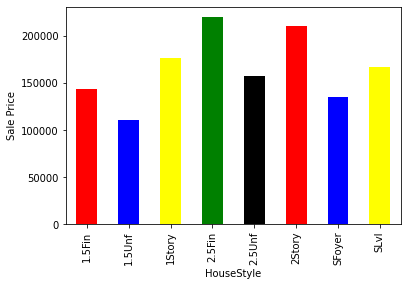

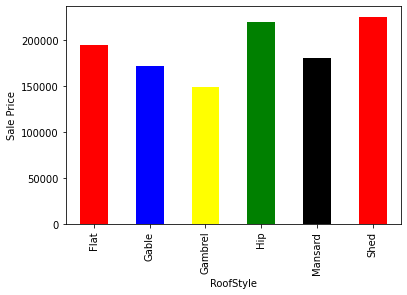

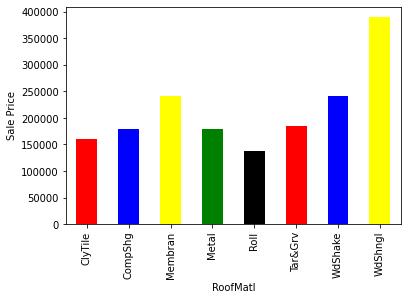

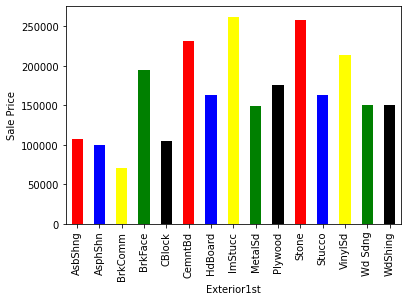

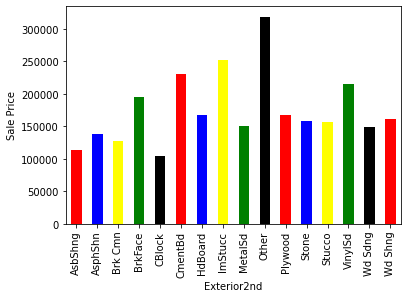

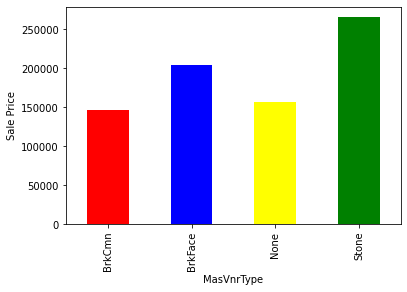

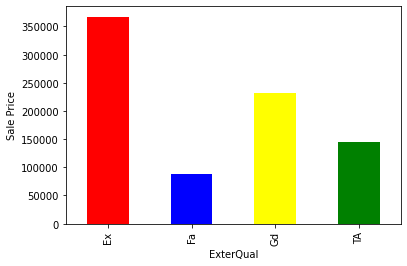

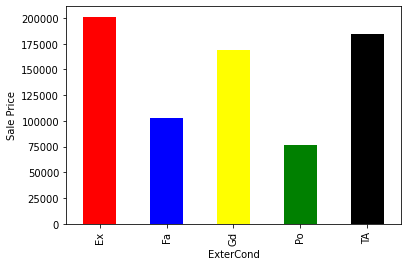

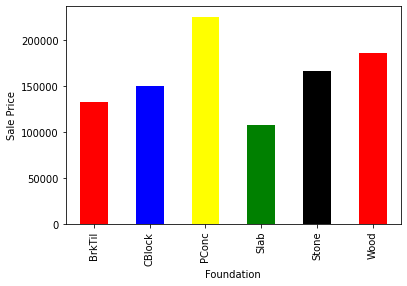

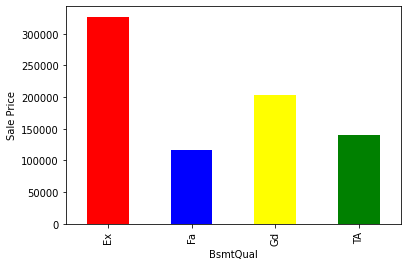

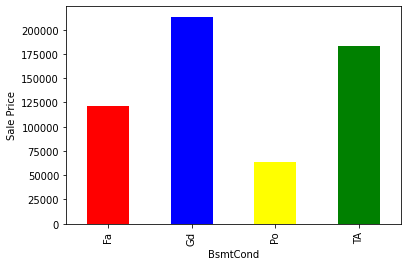

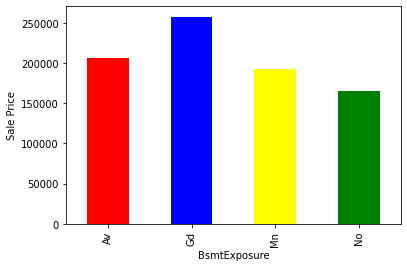

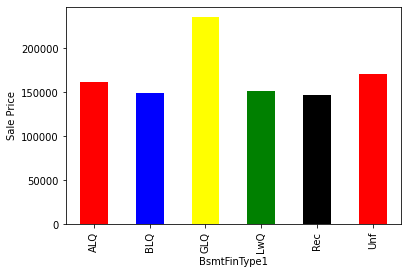

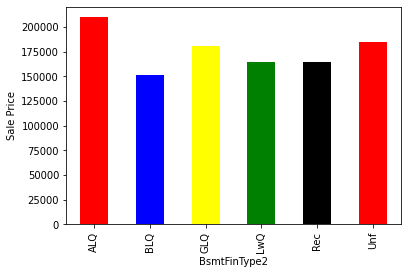

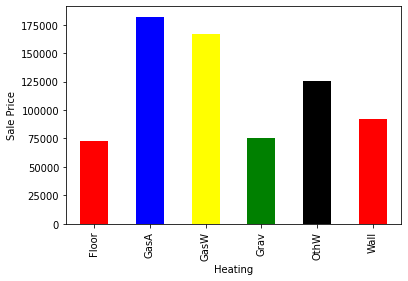

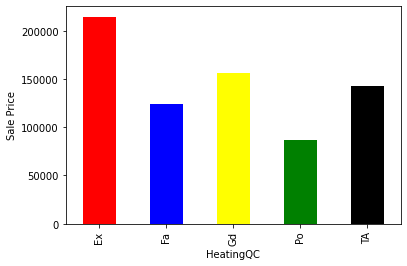

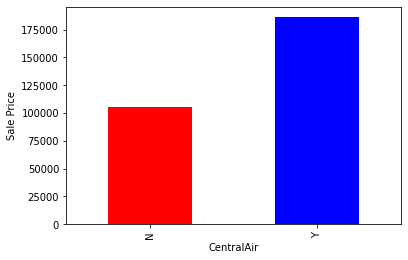

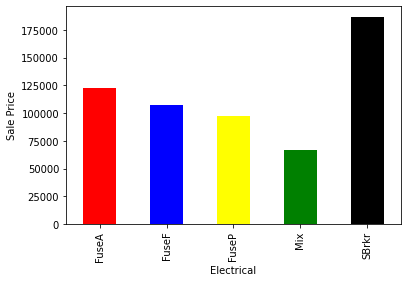

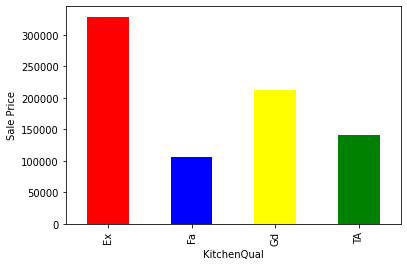

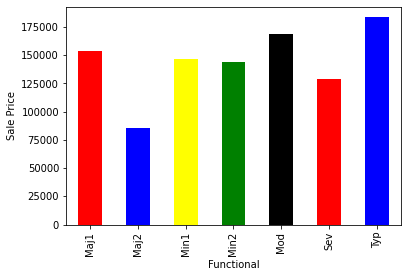

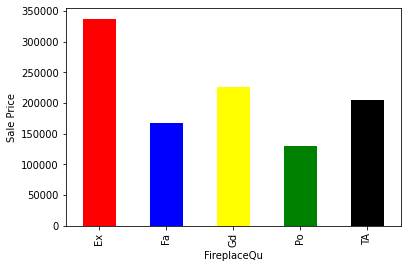

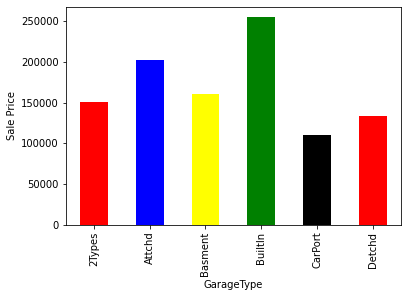

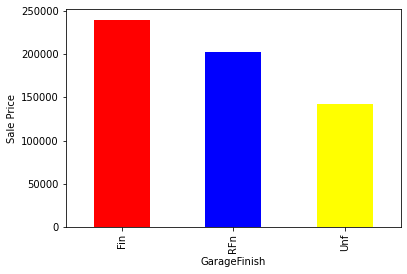

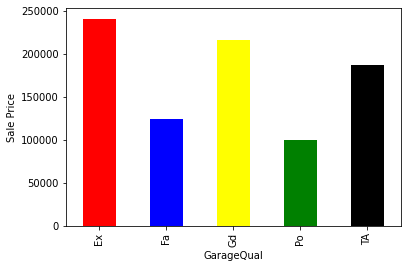

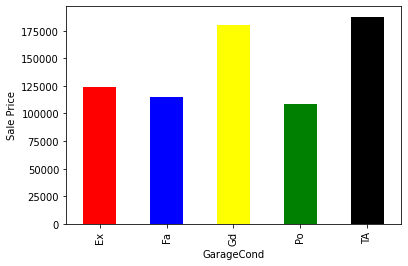

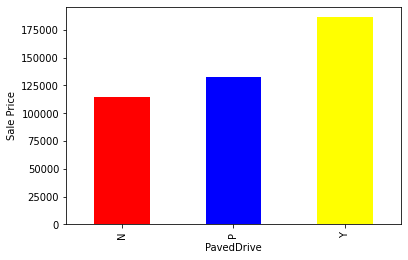

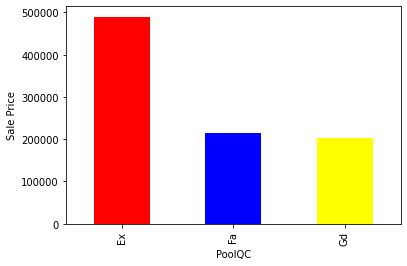

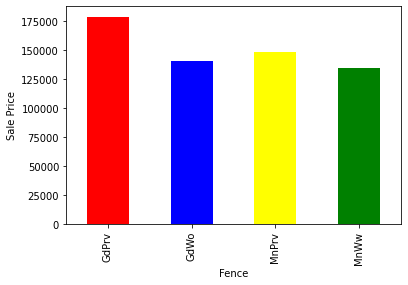

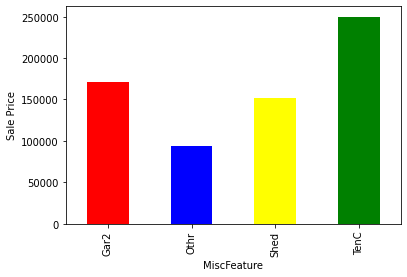

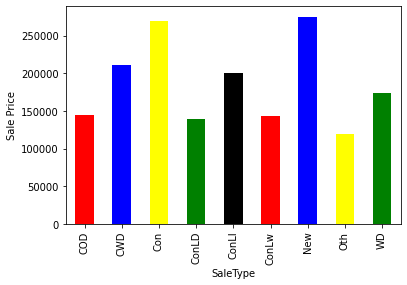

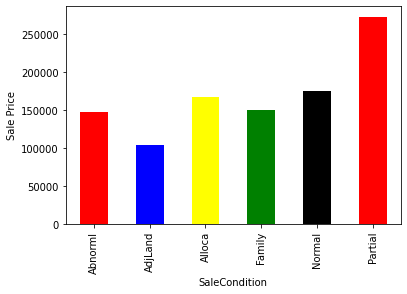

In [25]:
for i in categorical_featues:
    data = train_data.copy()
    data.groupby(i)['SalePrice'].mean().plot.bar(color=["red","blue","yellow","green","black"])
    plt.xlabel(i)
    plt.ylabel("Sale Price")
    plt.show()